# Grades of Students

Problem of Regression and Classification

Cortez, P. (2008). Student Performance [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

Keywords: 
- Linear Regression, Polynomial, Random Forest
- Logistic Regression, SVM, Random Forest

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [170]:
df = pd.read_csv(r'C:\Users\Sabrina\OneDrive\Desktop\David_work\Python\student-mat.csv', delimiter = ";")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [172]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [174]:
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [176]:
# no missing values


In [178]:
le = LabelEncoder()
categorical_cols = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]
label_encoders = {} #store future encoders
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

In [180]:
scaler = StandardScaler()
numerical_cols = ["age", "Medu", "Fedu", "studytime", "failures","traveltime", "absences","famrel","freetime","goout","Dalc","Walc","health"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [182]:
df.drop(columns=["G3"]) 
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,1.023046,1,0,0,1.143856,1.360371,0,4,...,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,5,6,6
1,0,0,0.238380,1,0,1,-1.600009,-1.399970,0,2,...,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,5,5,6
2,0,0,-1.330954,1,1,1,-1.600009,-1.399970,0,2,...,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,7,8,10
3,0,0,-1.330954,1,0,1,1.143856,-0.479857,1,3,...,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,15,14,15
4,0,0,-0.546287,1,0,1,0.229234,0.440257,2,2,...,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,6,10,10


In [184]:
X = df.drop(columns=["G3"]) 
y = df["G3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [186]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,1.023046,1,0,0,1.143856,1.360371,0,4,...,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,5,6,6
1,0,0,0.238380,1,0,1,-1.600009,-1.399970,0,2,...,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,5,5,6
2,0,0,-1.330954,1,1,1,-1.600009,-1.399970,0,2,...,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,7,8,10
3,0,0,-1.330954,1,0,1,1.143856,-0.479857,1,3,...,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,15,14,15
4,0,0,-0.546287,1,0,1,0.229234,0.440257,2,2,...,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,2.592380,1,1,0,-0.685387,-0.479857,3,3,...,1.178860,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,9,9,9
391,1,1,0.238380,1,1,1,0.229234,-1.399970,3,3,...,-2.171138,0.766399,1.700867,1.707469,1.328545,-1.119469,-0.338906,14,16,16
392,1,1,3.377047,0,0,1,-1.600009,-1.399970,2,2,...,1.178860,1.768808,-0.097908,1.707469,0.551100,-0.399289,-0.338906,10,8,7
393,1,1,1.023046,0,1,1,0.229234,-0.479857,3,2,...,0.062194,0.766399,-1.896683,1.707469,1.328545,1.041070,-0.714236,11,12,10


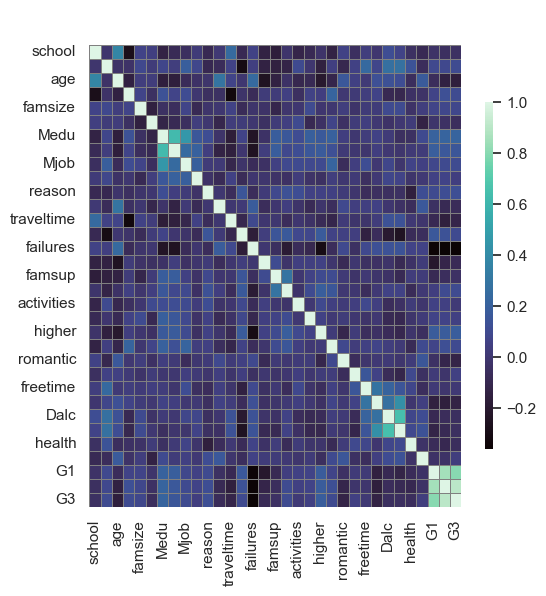

In [188]:
sns.set_theme(style="dark")
plt.figure(figsize=(6, 6))
ax = sns.heatmap(
    df.select_dtypes(include=['number']).corr(),
    annot=False,
    cmap="mako",
    fmt=".2f",
    linewidths=0.5,
    linecolor="gray",
    annot_kws={"size": 6, "color": "white"},
    cbar_kws={"shrink": 0.75, "aspect": 40},
)
plt.title("Correlation Matrix", fontsize=14, color="white", fontweight="bold", pad=15)
plt.show()

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print("Linear Regression Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")


Linear Regression Performance:
R² Score: 0.7546
Mean Absolute Error: 1.50
Mean Squared Error: 5.03


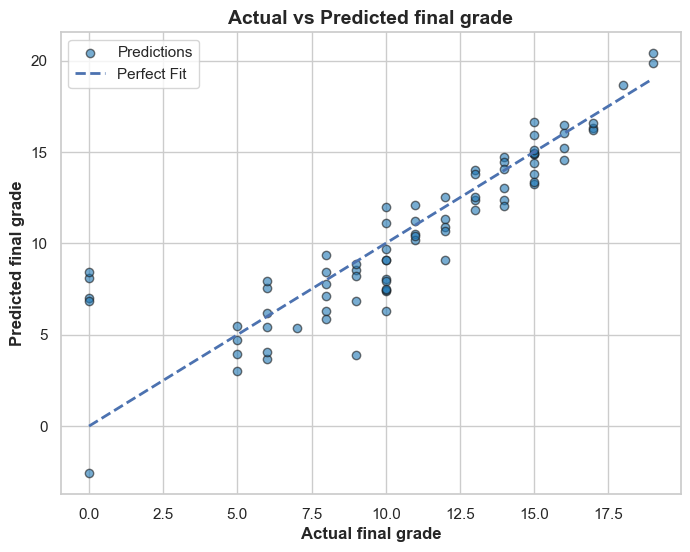

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="#1f77b4", alpha=0.6, edgecolors="k", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "b--", lw=2, label="Perfect Fit")
plt.xlabel("Actual final grade", fontsize=12, fontweight="bold")
plt.ylabel("Predicted final grade", fontsize=12, fontweight="bold")
plt.title("Actual vs Predicted final grade", fontsize=14, fontweight="bold")
plt.legend()
plt.show()



The model performs poorly. Try different model.

In [195]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

print("Random Forest Regression Performance:")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")

Random Forest Regression Performance:
R² Score: 0.8289
Mean Absolute Error: 1.11
Mean Squared Error: 3.51


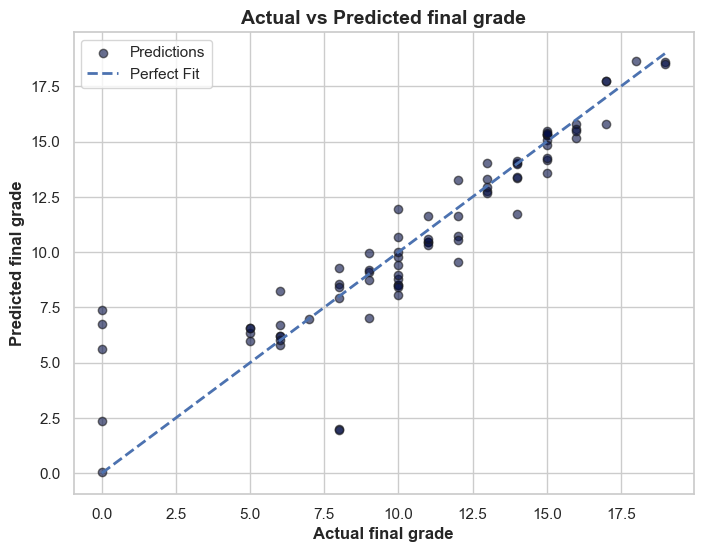

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color="#030e45", alpha=0.6, edgecolors="k", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "b--", lw=2, label="Perfect Fit")
plt.xlabel("Actual final grade", fontsize=12, fontweight="bold")
plt.ylabel("Predicted final grade", fontsize=12, fontweight="bold")
plt.title("Actual vs Predicted final grade", fontsize=14, fontweight="bold")
plt.legend()
plt.show()



Model slighty improved but not perfect. Try other approach

In [200]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_features = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly_features, LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"R² Score (Polynomial Regression, Degree=2): {r2_poly:.4f}")


R² Score (Polynomial Regression, Degree=2): 0.2294


In [202]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_features = PolynomialFeatures(degree=3)
poly_model = make_pipeline(poly_features, LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"R² Score (Polynomial Regression, Degree=2): {r2_poly:.4f}")


R² Score (Polynomial Regression, Degree=2): 0.3126


Polynomial Regression does not work. The best model was Random Forest. Improve performance with GridSearch.

In [205]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [76]:
best_rf_model = grid_search.best_estimator_


In [207]:

y_pred_best = best_rf_model.predict(X_test)

# Evaluate performance
r2_best = r2_score(y_test, y_pred_best)
print(f"R² Score (Polynomial Regression, Degree=2): {r2_best:.4f}")

R² Score (Polynomial Regression, Degree=2): 0.7946


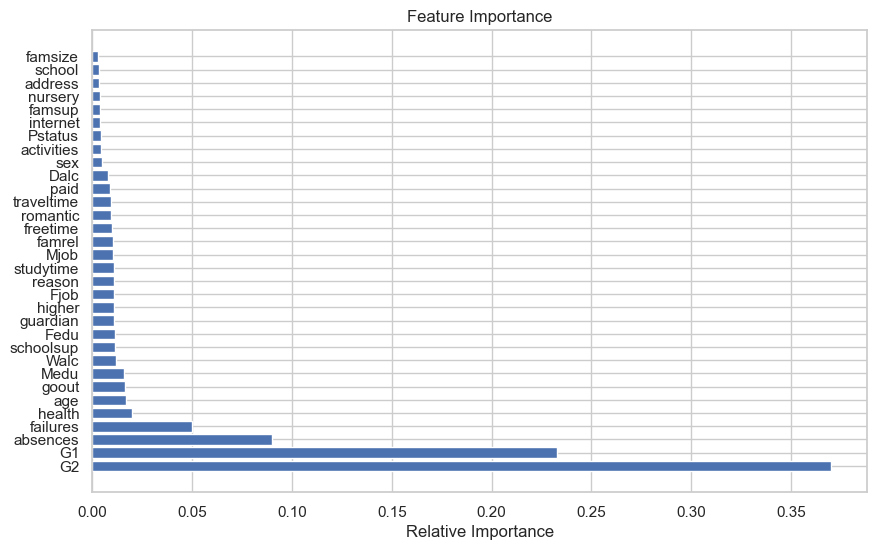

In [209]:
# Get feature importance
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.show()


In [ ]:
# model actually performs worse after gridSearchCV

In [211]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,1.023046,1,0,0,1.143856,1.360371,0,4,...,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,5,6,6
1,0,0,0.238380,1,0,1,-1.600009,-1.399970,0,2,...,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,5,5,6
2,0,0,-1.330954,1,1,1,-1.600009,-1.399970,0,2,...,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,7,8,10
3,0,0,-1.330954,1,0,1,1.143856,-0.479857,1,3,...,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,15,14,15
4,0,0,-0.546287,1,0,1,0.229234,0.440257,2,2,...,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,2.592380,1,1,0,-0.685387,-0.479857,3,3,...,1.178860,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,9,9,9
391,1,1,0.238380,1,1,1,0.229234,-1.399970,3,3,...,-2.171138,0.766399,1.700867,1.707469,1.328545,-1.119469,-0.338906,14,16,16
392,1,1,3.377047,0,0,1,-1.600009,-1.399970,2,2,...,1.178860,1.768808,-0.097908,1.707469,0.551100,-0.399289,-0.338906,10,8,7
393,1,1,1.023046,0,1,1,0.229234,-0.479857,3,2,...,0.062194,0.766399,-1.896683,1.707469,1.328545,1.041070,-0.714236,11,12,10


# The model does not perform perfectly with a maximum R2 of 0.82. 
Continue with classification

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [215]:
# Convert G3 to a binary outcome (Pass/Fail at the threshold of ~ 66%)
df['G3'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)
print(df.head())


   school  sex       age  address  famsize  Pstatus      Medu      Fedu  Mjob  \
0       0    0  1.023046        1        0        0  1.143856  1.360371     0   
1       0    0  0.238380        1        0        1 -1.600009 -1.399970     0   
2       0    0 -1.330954        1        1        1 -1.600009 -1.399970     0   
3       0    0 -1.330954        1        0        1  1.143856 -0.479857     1   
4       0    0 -0.546287        1        0        1  0.229234  0.440257     2   

   Fjob  ...    famrel  freetime     goout      Dalc      Walc    health  \
0     4  ...  0.062194 -0.236010  0.801479 -0.540699 -1.003789 -0.399289   
1     2  ...  1.178860 -0.236010 -0.097908 -0.540699 -1.003789 -0.399289   
2     2  ...  0.062194 -0.236010 -0.997295  0.583385  0.551100 -0.399289   
3     3  ... -1.054472 -1.238419 -0.997295 -0.540699 -1.003789  1.041070   
4     2  ...  0.062194 -0.236010 -0.997295 -0.540699 -0.226345  1.041070   

   absences  G1  G2  G3  
0  0.036424   5   6   0  
1 -0

In [217]:
X = df.drop(columns=['G3'])
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [219]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [235]:
# Initialize and train Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.9367088607594937


In [223]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))


Decision Tree Accuracy: 0.8860759493670886


In [225]:
# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9113924050632911


In [227]:
# Initialize and train Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.8734177215189873


In [229]:
# Confusion Matrix and Classification Report for Logistic Regression
print("Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix and Classification Report for Decision Tree
print("Decision Tree - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree))
print("Classification Report:")
print(classification_report(y_test, y_pred_dtree))

# Confusion Matrix and Classification Report for Random Forest
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix and Classification Report for SVM
print("SVM - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Logistic Regression - Confusion Matrix:
[[25  2]
 [ 3 49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.96      0.94      0.95        52

    accuracy                           0.94        79
   macro avg       0.93      0.93      0.93        79
weighted avg       0.94      0.94      0.94        79

Decision Tree - Confusion Matrix:
[[23  4]
 [ 5 47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.92      0.90      0.91        52

    accuracy                           0.89        79
   macro avg       0.87      0.88      0.87        79
weighted avg       0.89      0.89      0.89        79

Random Forest - Confusion Matrix:
[[25  2]
 [ 5 47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
   

Cross-validation accuracy: 0.8986
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters from GridSearchCV: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.9114


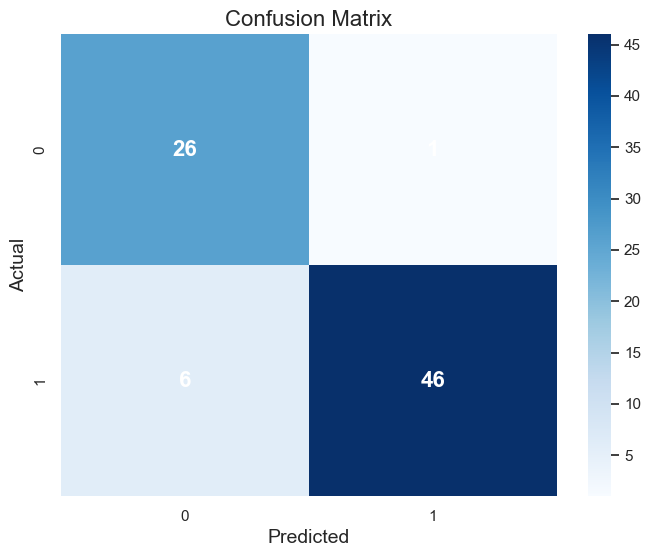

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        27
           1       0.98      0.88      0.93        52

    accuracy                           0.91        79
   macro avg       0.90      0.92      0.91        79
weighted avg       0.92      0.91      0.91        79



In [239]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {np.mean(cv_scores):.4f}")

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],          # Regularization strength
    'penalty': ['l1', 'l2'],                       # Regularization types
    'solver': ['liblinear', 'saga']                # Solvers
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16, "color": "white", "weight": "bold"})
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [241]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.9367088607594937


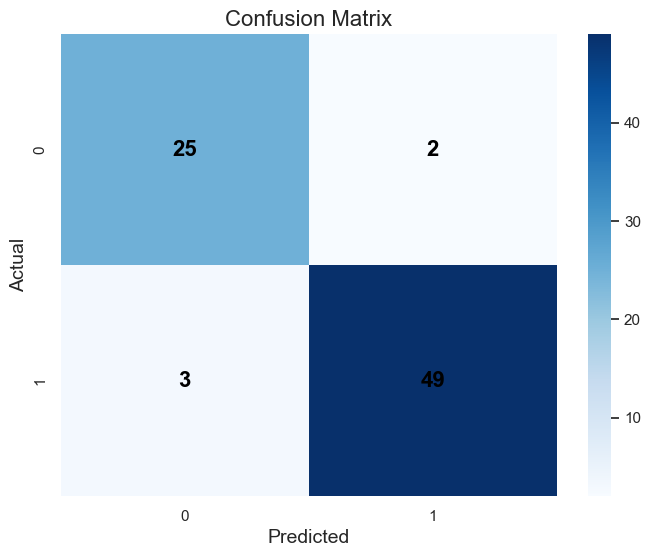

In [247]:
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16, "color": "black", "weight": "bold"})
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()